In [2]:
#GP 模型有兩種 一種是考慮距離，一種是一口氣討論10個點
import numpy as np
import sklearn as sk

import pickle
import pandas as pd
import os


In [62]:
#使用GaussianProcessRegressor套件

from sklearn.gaussian_process import GaussianProcessRegressor as gpr
from sklearn.gaussian_process.kernels import RationalQuadratic,ConstantKernel

In [63]:
#先把最一開始的資料Excel叫出來
path =r'./data/raw_data/'
files = os.listdir(path)
raw_Y = {}
for f in files:
    #print(f)
    df = pd.DataFrame()
    df = pd.read_excel(path+f)
    #print(df)
    YY = np.zeros(810)
    for i in range(810):
        YY[i] = df['y_value'][i]
    raw_Y[f] = YY.reshape(810,1)
X = np.zeros((810,5))
for col in range(0,5):
    temp = []
    temp = df[col][0:810]
    for i in range(810):
        X[i][col] = temp[i]
raw_X = np.array(X)

In [64]:
print(raw_X.shape ,raw_Y['vel_3_data.xlsx'].shape)
#是有包含距離的因素

(810, 5) (810, 1)


In [7]:
#使用US所採用的參數
# {'alpha': 1e-10,
#  'copy_X_train': True,
#  'kernel': 1**2 * RationalQuadratic(alpha=0.5, length_scale=3),
#  'kernel__k1': 1**2,
#  'kernel__k1__constant_value': 1.0,
#  'kernel__k1__constant_value_bounds': (0.1, 10.0),
#  'kernel__k2': RationalQuadratic(alpha=0.5, length_scale=3),
#  'kernel__k2__alpha': 0.5,
#  'kernel__k2__alpha_bounds': (0.1, 10.0),
#  'kernel__k2__length_scale': 3.0,
#  'kernel__k2__length_scale_bounds': (0.1, 10.0),
#  'n_restarts_optimizer': 5,
#  'normalize_y': False,
#  'optimizer': 'fmin_l_bfgs_b',
#  'random_state': None}

In [66]:
kernel_Gp = ConstantKernel(
    constant_value=1.0,constant_value_bounds=(0.1,10.0)) * RationalQuadratic(
    alpha=0.5,length_scale=3,alpha_bounds=(0.1,10),length_scale_bounds=(0.1,10))

In [67]:
model_vel_03 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
model_vel_15 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
model_TI_03 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
model_TI_15 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);

In [68]:
#model1 跟US一模一樣的

model_vel_03.fit(X=raw_X,y=raw_Y['vel_3_data.xlsx'])
model_vel_15.fit(X=raw_X,y=raw_Y['vel_15_data.xlsx'])
model_TI_03.fit(X=raw_X,y=raw_Y['TI_3_data.xlsx'])
model_TI_15.fit(X=raw_X,y=raw_Y['TI_15_data.xlsx'])

C:\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([5.70901910e+01, 5.39116495e+01, 1.76667537e-03]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 13, 'warnflag': 2}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RationalQuadratic(alpha=0.5, length_scale=3),
             n_restarts_optimizer=5, normalize_y='False',
             optimizer='fmin_l_bfgs_b', random_state=None)

In [13]:
f = open('model_vel_03', 'wb')
pickle.dump(model_vel_03, f)
f = open('model_vel_15', 'wb')
pickle.dump(model_vel_15, f)
f = open('model_TI_03', 'wb')
pickle.dump(model_TI_03, f)
f = open('model_TI_15', 'wb')
pickle.dump(model_TI_15, f)

In [15]:
# #model2 不考慮距離因素
# model2_vel_03 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
# model2_vel_15 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
# model2_TI_03 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);
# model2_TI_15 = gpr(kernel=kernel_Gp,n_restarts_optimizer=5,normalize_y="False",optimizer='fmin_l_bfgs_b',random_state=None);

# TrainX = np.load('data/X_data.npy')
# pkl_file = open('data/Y_data.pkl','rb')
# TrainY=pickle.load(pkl_file)
# pkl_file.close()

# print(TrainX.shape,TrainY['vel_3_data.xlsx'].shape)

# model2_vel_03.fit(X=TrainX,y=TrainY['vel_3_data.xlsx'])
# model2_vel_15.fit(X=TrainX,y=TrainY['vel_15_data.xlsx'])
# model2_TI_03.fit(X=TrainX,y=TrainY['TI_3_data.xlsx'])
# model2_TI_15.fit(X=TrainX,y=TrainY['TI_15_data.xlsx'])

# model2_TI_15.kernel_

# f = open('model2_vel_03', 'wb')
# pickle.dump(model2_vel_03, f)
# f = open('model2_vel_15', 'wb')
# pickle.dump(model2_vel_15, f)
# f = open('model2_TI_03', 'wb')
# pickle.dump(model2_TI_03, f)
# f = open('model2_TI_15', 'wb')
# pickle.dump(model2_TI_15, f)

In [21]:
#Model建立好了，畫圖
# 線圖（Line plot）
# Python
# 使用 matplotlib.pyplot 的 plot() 方法。
# 散佈圖（Scatter plot）
# Python
# 使用 matplotlib.pyplot 的 scatter() 方法。

In [70]:
# #節點 d
d  = np.array( [[ 1.2, 2 , 3, 4, 5, 6, 7, 8, 9, 10 ] ])

#  np.concatenate((d.T, d.T), axis=1)

Bp = .5488919
Bd = .8774534
H1 = .730
H2 = .005
c_e4 = H1 / Bp
c_e5 = H2 / Bd

print(Bp , Bd, c_e4, c_e5)


# turbs = np.array( [ Bp , Bd, c_e4, c_e5 ] )

# inputdata (10,5)
X1 , X2, X3 ,X4  = Bp , Bd, c_e4, c_e5
X = [ X1 , X2, X3 ,X4 ] 
def input_data_process(para = X, d  = np.array( [[ 1.2, 2 , 3, 4, 5, 6, 7, 8, 9, 10 ] ]) ):
    input_data = d.transpose()
    for i in para:
        temp = [[i]]*10
        input_data = np.concatenate((input_data, temp), axis=1)
    return input_data
#檢查過沒問題


0.5488919 0.8774534 1.3299522182783168 0.005698308309022451


In [15]:
# Experimental Data
pkl_file = open('./data/exp_data','rb')
exp = pickle.load(pkl_file)
pkl_file.close()

In [22]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 2)

%matplotlib inline

#plot
axarr[0, 0].plot(d.T, exp['vel_3_data'],'o')
axarr[0, 0].plot(d.T, model_vel_03.predict(input_data_process()))
axarr[0, 0].set_title('vel_03_')
 
axarr[0, 1].plot(d.T, exp['vel_15_data'],'o')
axarr[0, 1].plot(d.T, model_vel_15.predict(input_data_process()))
axarr[0, 1].set_title('vel_15_data')
 
axarr[1, 0].plot(d.T, exp['TI_3_data'],'o')
axarr[1, 0].plot(d.T, model_TI_03.predict(input_data_process()))
axarr[1, 0].set_title('TI_3_data')
 
axarr[1, 1].plot(d.T, exp['TI_15_data'],'o')
axarr[1, 1].plot(d.T, model_TI_15.predict(input_data_process()))
axarr[1, 1].set_title('TI_15_data')

f.tight_layout()

f.savefig(str(X)+'.png')

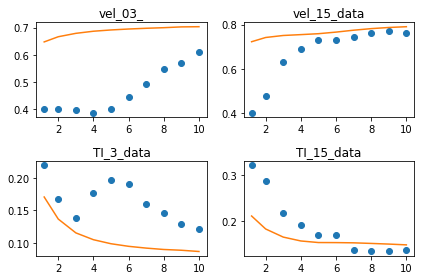

In [23]:
f

In [34]:
abs(exp['vel_3_data'] - model_vel_03.predict(input_data_process())[0])/exp['vel_3_data'][5]

array([0.55204615, 0.54979896, 0.56552929, 0.58575401, 0.55204615,
       0.45541693, 0.34530457, 0.22395626, 0.17676525, 0.08463042])

In [30]:
abs(exp['vel_3_data'] - model_vel_03.predict(input_data_process())[0])/exp['vel_3_data']

array([0.61109586, 0.6070981 , 0.6355064 , 0.67354143, 0.61109586,
       0.45541693, 0.31105371, 0.18186229, 0.13824347, 0.06173858])

In [31]:
sum(abs(exp['vel_3_data'] - model_vel_03.predict(input_data_process())[0])/exp['vel_3_data'])/10

0.4286652630794873

In [29]:
#寫一個def 計算誤差和畫圖的 
def MAEPandPlot(input_data = X,target = exp):    
    #plot
    f, axarr = plt.subplots(2, 2)
    to_para = input_data
    print("[X1,X2,X3,X4] = "+str(input_data))
    axarr[0, 0].plot(d.T, exp['vel_3_data'],'o',c = 'red')
    axarr[0, 0].plot(d.T, model_vel_03.predict(input_data_process(para=to_para)),c = 'b')    
    mape_vel_3 = sum(abs(exp['vel_3_data'] - model_vel_03.predict(input_data_process(para=to_para))[0])/exp['vel_3_data'])/10
    axarr[0, 0].set_title('vel_3_data')
    print ("mape_vel_3："+str(mape_vel_3))
    
    axarr[0, 1].plot(d.T, exp['vel_15_data'],'o',c = 'red')
    axarr[0, 1].plot(d.T, model_vel_15.predict(input_data_process(para=to_para)),c = 'b')   
    mape_vel_15 = sum(abs(exp['vel_15_data'] - model_vel_15.predict(input_data_process(para=to_para))[0])/exp['vel_15_data'])/10
    axarr[0, 1].set_title('vel_15_data')
    print ("mape_vel_15："+str(mape_vel_15))
           
    axarr[1, 0].plot(d.T, exp['TI_3_data'],'o',c = 'red')
    axarr[1, 0].plot(d.T, model_TI_03.predict(input_data_process(para=to_para)),c = 'b')
    mape_TI_3 = sum(abs(exp['TI_3_data'] - model_TI_03.predict(input_data_process(para=to_para))[0])/exp['TI_3_data'])/10
    axarr[1, 0].set_title('TI_3_data')
    print ("mape_TI_3："+str(mape_TI_3))
    
    axarr[1, 1].plot(d.T, exp['TI_15_data'],'o',c = 'red')
    axarr[1, 1].plot(d.T, model_TI_15.predict(input_data_process(para=to_para)),c = 'b')
    mape_TI_15 = sum(abs(exp['TI_15_data'] - model_TI_15.predict(input_data_process(para=to_para))[0])/exp['TI_15_data'])/10
    axarr[1, 1].set_title('TI_15_data' )
    print ( "mape_TI_15："+str(mape_TI_15))
    
    
    f.tight_layout()
    
    #cal MAPE
    
    MAPE = (mape_vel_3+mape_vel_15+mape_TI_3+mape_TI_15)/4
    
    print("Total_MAPE："+ str(MAPE))
    
    plt.show
    
    

In [71]:
#寫一個def 計算誤差和畫圖的 
def MAEPandPlot(input_data = X,target = exp):    
    #plot
    f, axarr = plt.subplots(2, 2)
    to_para = input_data
    print("[X1,X2,X3,X4] = "+str(input_data))
    axarr[0, 0].plot(d.T, exp['vel_3_data'],'o',c = 'red')
    axarr[0, 0].plot(d.T, model_vel_03.predict(input_data_process(para=to_para)),c = 'b')    
    mape_vel_3 = sum(abs(exp['vel_3_data'] - model_vel_03.predict(input_data_process(para=to_para))[:,0])/exp['vel_3_data'])/10
    axarr[0, 0].set_title('vel_3_data')
    print ("mape_vel_3："+str(mape_vel_3))
    
    axarr[0, 1].plot(d.T, exp['vel_15_data'],'o',c = 'red')
    axarr[0, 1].plot(d.T, model_vel_15.predict(input_data_process(para=to_para)),c = 'b')   
    mape_vel_15 = sum(abs(exp['vel_15_data'] - model_vel_15.predict(input_data_process(para=to_para))[:,0])/exp['vel_15_data'])/10
    axarr[0, 1].set_title('vel_15_data')
    print ("mape_vel_15："+str(mape_vel_15))
           
    axarr[1, 0].plot(d.T, exp['TI_3_data'],'o',c = 'red')
    axarr[1, 0].plot(d.T, model_TI_03.predict(input_data_process(para=to_para)),c = 'b')
    mape_TI_3 = sum(abs(exp['TI_3_data'] - model_TI_03.predict(input_data_process(para=to_para))[:,0])/exp['TI_3_data'])/10
    axarr[1, 0].set_ylim([0, 0.5])
    axarr[1, 0].set_title('TI_3_data')
    print ("mape_TI_3："+str(mape_TI_3))
    
    axarr[1, 1].plot(d.T, exp['TI_15_data'],'o',c = 'red')
    axarr[1, 1].plot(d.T, model_TI_15.predict(input_data_process(para=to_para)),c = 'b')
    mape_TI_15 = sum(abs(exp['TI_15_data'] - model_TI_15.predict(input_data_process(para=to_para))[:,0])/exp['TI_15_data'])/10
    axarr[1, 1].set_title('TI_15_data' )
    print ( "mape_TI_15："+str(mape_TI_15))
    
    
    f.tight_layout()
    
    #cal MAPE
    
    MAPE = (mape_vel_3+mape_vel_15+mape_TI_3+mape_TI_15)/4
    
    print("Total_MAPE："+ str(MAPE))
    
    plt.show

In [23]:
Bp = .5488919


Bd = .8774534

H1 = .730

H2 = .005
c_e4 = H1 / Bp
c_e5 = H2 / Bd
turbs = np.array( [ Bp , c_e4, Bd, c_e5 ] )

In [22]:
input_data_process(turbs)

array([[  1.20000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  2.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  3.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  4.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  5.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  6.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  7.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  8.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  9.00000000e+00,   5.48891900e-01,   8.77453400e-01,
          1.32995222e+00,   5.69830831e-03],
       [  1.00000000e+01,   5.4889190

In [27]:
MAEPandPlot(input_data=turbs)

NameError: name 'turbs' is not defined

In [ ]:
0.01	4	0.328534	0.0518388

In [80]:
X = [0.01,4,0.33,0.05]


[X1,X2,X3,X4] = [0.01, 4, 0.33, 0.05]
mape_vel_3：0.16044568712559987
mape_vel_15：0.21068691606165527
mape_TI_3：0.29786374902560164
mape_TI_15：0.18631244140173717
Total_MAPE：0.2138271984036485


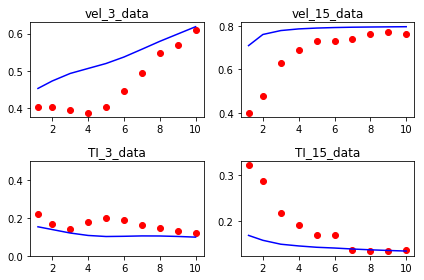

In [81]:
MAEPandPlot(input_data=X)

[X1,X2,X3,X4] = [1, 0.8097896297591158, 1, 0.01]
mape_vel_3：0.3230404428013622
mape_vel_15：0.1291144899996671
mape_TI_3：0.3594018275800924
mape_TI_15：0.10847712119784927
Total_MAPE：0.23000847039474273


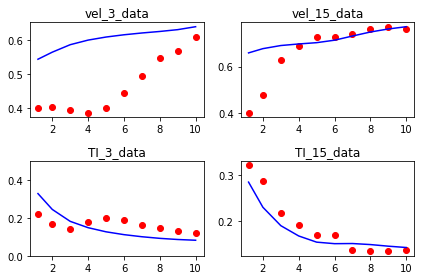

In [74]:
MAEPandPlot(input_data=[1, 0.8097896297591158, 1, 0.01])

In [30]:
d = np.arange(1,11,dtype=float)

d[0] = 1.2

d

interval_value = 0.05

X1 = np.arange(min(interval_value,0.1),1+interval_value,interval_value)
X2 = np.arange(min(interval_value,0.1),4+interval_value,interval_value)
X3 = np.arange(min(interval_value,0.1),1+interval_value,interval_value)
X4 = np.arange(min(interval_value,0.1),4+interval_value,interval_value)
X1[-1] = 1
X2[-1] = 4
X3[-1] = 1
X4[-1] = 4    



A,B,C,D,dis = np.meshgrid(X1,X2,X3,X4,d)



dis = dis.reshape(A.size,1)
A = A.reshape(A.size,1)

B =B.reshape(A.size,1)

C =C.reshape(A.size,1)

D =D.reshape(A.size,1)

K = np.hstack((dis,A,B,C,D))

In [53]:
np.save('data/Exhaustive_data',K)

In [54]:
K

array([[  1.2 ,   0.05,   0.05,   0.05,   0.05],
       [  2.  ,   0.05,   0.05,   0.05,   0.05],
       [  3.  ,   0.05,   0.05,   0.05,   0.05],
       ..., 
       [  8.  ,   1.  ,   4.  ,   1.  ,   4.  ],
       [  9.  ,   1.  ,   4.  ,   1.  ,   4.  ],
       [ 10.  ,   1.  ,   4.  ,   1.  ,   4.  ]])

In [47]:
VV = model_vel_03.predict(X=K[100000:200000])

In [51]:
V_10[0]

array([ 0.8038051 ,  0.80710374,  0.80743519,  0.80723935,  0.80704367,
        0.80686453,  0.80669796,  0.80654726,  0.80633243,  0.80634061])

In [50]:
V_10 = VV.reshape(int(len(VV)/10),10)

In [45]:
len(model_vel_03.predict(X=K[100000:200000]))

100000

In [36]:
K.shape

(25600000, 5)

In [43]:
print(list(range(0,len(K),100000)))

[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000, 3900000, 4000000, 4100000, 4200000, 4300000, 4400000, 4500000, 4600000, 4700000, 4800000, 4900000, 5000000, 5100000, 5200000, 5300000, 5400000, 5500000, 5600000, 5700000, 5800000, 5900000, 6000000, 6100000, 6200000, 6300000, 6400000, 6500000, 6600000, 6700000, 6800000, 6900000, 7000000, 7100000, 7200000, 7300000, 7400000, 7500000, 7600000, 7700000, 7800000, 7900000, 8000000, 8100000, 8200000, 8300000, 8400000, 8500000, 8600000, 8700000, 8800000, 8900000, 9000000, 9100000, 9200000, 9300000, 9400000, 9500000, 9600000, 9700000, 9800000, 9900000, 10000000, 10100000, 10200000, 10300000, 10400000, 10500000, 10600000, 10700000, 10800000, 10900000, 11000000, 1110